Setting up and doing imports.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
from os import path

In [3]:
bs = 64

Creating folders and downloading files for each category.

In [4]:
catlist = ['ballsports','celebrities','esports','felines','light','martialarts','music','nature','water','wrestling','cartoons']

In [5]:
for cat in catlist:
    folder = cat
    file = cat + '.csv'
    path = Path('data/categories')
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest, max_pics=500)

In [6]:
path.ls()

[PosixPath('data/categories/light'),
 PosixPath('data/categories/nature.csv'),
 PosixPath('data/categories/medium_model.pkl'),
 PosixPath('data/categories/light.csv'),
 PosixPath('data/categories/music.csv'),
 PosixPath('data/categories/esports.csv'),
 PosixPath('data/categories/martialarts'),
 PosixPath('data/categories/wrestling'),
 PosixPath('data/categories/wrestling.csv'),
 PosixPath('data/categories/nature'),
 PosixPath('data/categories/celebrities.csv'),
 PosixPath('data/categories/hard_model.pkl'),
 PosixPath('data/categories/.ipynb_checkpoints'),
 PosixPath('data/categories/water'),
 PosixPath('data/categories/martialarts.csv'),
 PosixPath('data/categories/felines.csv'),
 PosixPath('data/categories/water.csv'),
 PosixPath('data/categories/cartoons.csv'),
 PosixPath('data/categories/easy_model.pkl'),
 PosixPath('data/categories/ballsports'),
 PosixPath('data/categories/cartoons'),
 PosixPath('data/categories/esports'),
 PosixPath('data/categories/models'),
 PosixPath('data/cate

In [7]:
classes = catlist

In [8]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

ballsports


celebrities


esports


felines


light


martialarts


music


nature


water


wrestling


cartoons


In [9]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [10]:
data.classes

['ballsports',
 'cartoons',
 'celebrities',
 'esports',
 'felines',
 'light',
 'martialarts',
 'music',
 'nature',
 'water',
 'wrestling']

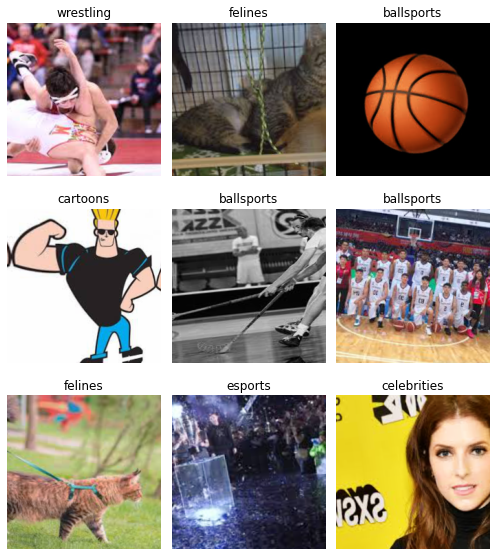

In [11]:
data.show_batch(rows=3, figsize=(7,8))

In [12]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['ballsports',
  'cartoons',
  'celebrities',
  'esports',
  'felines',
  'light',
  'martialarts',
  'music',
  'nature',
  'water',
  'wrestling'],
 11,
 880,
 220)

In [13]:
print((type(data.train_ds)))


<class 'fastai.data_block.LabelList'>


In [14]:
easy_model = cnn_learner(data, models.resnet34, metrics=error_rate)
easy_model.fit_one_cycle(1)
easy_model.save('easy')

epoch,train_loss,valid_loss,error_rate,time
0,1.711086,0.699510,0.181818,00:05


In [20]:
medium_model = cnn_learner(data, models.resnet34, metrics=error_rate)
medium_model.fit_one_cycle(3)
medium_model.save('medium')

epoch,train_loss,valid_loss,error_rate,time
0,2.340325,0.585940,0.163636,00:04
1,1.267998,0.441204,0.127273,00:04
2,0.880086,0.425558,0.131818,00:04


In [16]:
hard_model = cnn_learner(data, models.resnet34, metrics=error_rate)
hard_model.fit_one_cycle(5)
hard_model.save('hard')

epoch,train_loss,valid_loss,error_rate,time
0,2.599171,0.590851,0.190909,00:04
1,1.440644,0.422844,0.104545,00:04
2,0.960402,0.399042,0.113636,00:04
3,0.694341,0.356336,0.109091,00:04
4,0.541981,0.352719,0.109091,00:04


In [17]:
hard_model.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


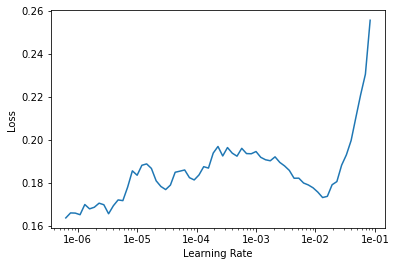

In [18]:
hard_model.recorder.plot()

In [19]:
hard_model.fit_one_cycle(5, max_lr=slice(1e-05,1e-06))

epoch,train_loss,valid_loss,error_rate,time
0,0.177831,0.357688,0.113636,00:04
1,0.174308,0.354014,0.109091,00:04
2,0.180514,0.353286,0.113636,00:04
3,0.185551,0.349848,0.109091,00:04
4,0.182192,0.352066,0.109091,00:04


In [20]:
easy_model.path

PosixPath('data/categories')

In [24]:
easy_model.export()

In [25]:
medium_model.export()

In [26]:
hard_model.export()